In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("iris.csv")
target = "Species"
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

X = df[features]
y = df[target]

scaler = StandardScaler()

In [10]:

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(y_train)

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object


In [12]:
model.score(X_train, y_train)

0.9666666666666667

In [13]:
model.score(X_test, y_test)

0.9666666666666667

In [14]:
predict = model.predict(X_test)

In [15]:
confusion_matrix(y_test, predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [16]:
### Exercice 2

# Récuperation de la base de données
df2 = pd.read_csv("auto-mpg.csv")

In [17]:
print(df2.shape)

(392, 9)


In [18]:
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
target = "mpg"

X2 = df2[features]
y2 = df2[target]

X2_scaled = scaler.fit_transform(X2)

In [19]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_regression = KNeighborsRegressor(n_neighbors=3)
knn_regression.fit(X2_train, y2_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
knn_regression.score(X2_train, y2_train)

0.9270958889805258

In [22]:
knn_regression.score(X2_test, y2_test)

0.8599209050482889

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

score_test = []
score_train = []
for k in range (1, 10):
    knn_regression = KNeighborsRegressor(n_neighbors=k)
    knn_regression.fit(X2_train, y2_train)
    score_train.append( knn_regression.score(X2_train, y2_train))
    score_test.append(knn_regression.score(X2_test, y2_test))
    
print(score_train)
print(score_test)

[1.0, 0.9463938879237487, 0.9270958889805258, 0.9096333478032926, 0.9048033079041291, 0.9015023342452329, 0.8939265955123439, 0.8830698381489851, 0.8809900606502237]
[0.8267573663542161, 0.8211152936100438, 0.8599209050482889, 0.8623318750222104, 0.8617825603398058, 0.8634512994551339, 0.8574103591193164, 0.8550501523877623, 0.8554316185252038]


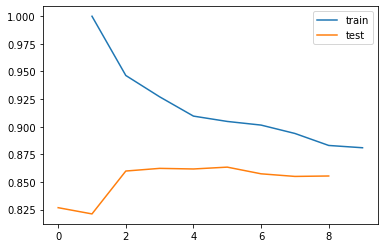

In [33]:
import matplotlib.pyplot as plt

plt.plot(range (1, 10),score_train,score_test)
plt.legend(["train","test"])
plt.show()